The bar graph shows how much the run time differs between  the two.

Obviously, paper proxy has more runtime.


New Proxy runtime for N=3: 0.05473780632019043
New Proxy runtime for N=4: 0.013062715530395508
New Proxy runtime for N=5: 0.0062465667724609375
New Proxy runtime for N=6: 0.003372669219970703
New Proxy runtime for N=7: 0.004579067230224609
New Proxy runtime for N=8: 0.006295680999755859
New Proxy runtime for N=9: 0.014080047607421875
Paper Proxy runtime for N=3: 0.004525899887084961
Paper Proxy runtime for N=4: 0.003515958786010742
Paper Proxy runtime for N=5: 0.006750822067260742
Paper Proxy runtime for N=6: 0.03110671043395996
Paper Proxy runtime for N=7: 0.026456117630004883
Paper Proxy runtime for N=8: 0.10166287422180176
Paper Proxy runtime for N=9: 0.1459355354309082


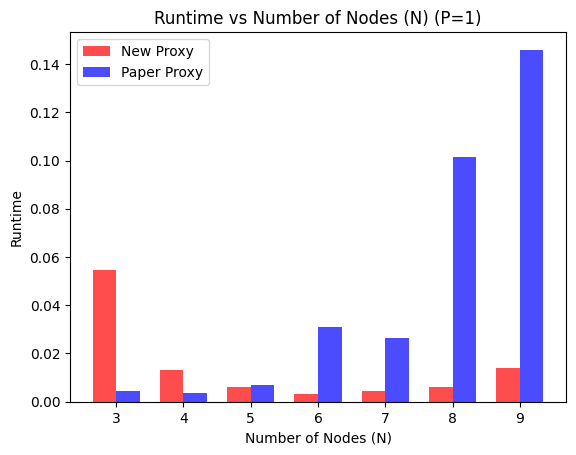

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import qokit.maxcut as mc
from QAOA_simulator import QAOA_run, get_simulator
import QAOA_proxy as qp
import QAOA_paper_proxy as qpp

# QAOAの層数
p = 1

# 結果を格納するリスト
runtime_new_proxy = []
runtime_paper_proxy = []

for N in range(3, 10):
    # エルデシュ・レーニイグラフの生成（ノード数N、エッジの確率0.5）
    G = nx.erdos_renyi_graph(N, 0.5)

    # グラフからIsingモデルの項を取得
    ising_model = mc.get_maxcut_terms(G)

    # シミュレーターの初期化
    sim = get_simulator(N, ising_model)

    # 初期のgammaとbetaを設定（全て0.1）
    init_gamma, init_beta = np.full((2, p), 0.1)

    # QAOAプロキシを使ってQAOAの実行（結果としてruntimeを取得）
    result = qp.QAOA_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
    
    # `result` の中に `runtime` が存在するか確認
    if "runtime" in result:
        runtime = result["runtime"]
        # 結果をリストに追加
        runtime_new_proxy.append(runtime)
        print(f"New Proxy runtime for N={N}: {runtime}")
    else:
        print(f"Warning: 'runtime' not found for New Proxy with N={N}")

for N in range(3, 10):
    # エルデシュ・レーニイグラフの生成（ノード数N、エッジの確率0.5）
    G = nx.erdos_renyi_graph(N, 0.5)

    # グラフからIsingモデルの項を取得
    ising_model = mc.get_maxcut_terms(G)

    # シミュレーターの初期化
    sim = get_simulator(N, ising_model)

    # 初期のgammaとbetaを設定（全て0.1）
    init_gamma, init_beta = np.full((2, p), 0.1)

    # QAOAプロキシを使ってQAOAの実行（結果としてruntimeを取得）
    result = qpp.QAOA_paper_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
    
    # `result` の中に `runtime` が存在するか確認
    if "runtime" in result:
        runtime = result["runtime"]
        # 結果をリストに追加
        runtime_paper_proxy.append(runtime)
        print(f"Paper Proxy runtime for N={N}: {runtime}")
    else:
        print(f"Warning: 'runtime' not found for Paper Proxy with N={N}")

# 棒グラフの作成
bar_width = 0.35  # バーの幅
index = np.arange(3, 10)  # x軸のインデックス

# 新しいプロキシの棒グラフ
plt.bar(index - bar_width / 2, runtime_new_proxy, bar_width, color='red', alpha=0.7, label='New Proxy')

# 論文プロキシの棒グラフ
plt.bar(index + bar_width / 2, runtime_paper_proxy, bar_width, color='blue', alpha=0.7, label='Paper Proxy')

# グラフの設定
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Runtime')
plt.title(f'Runtime vs Number of Nodes (N) (P={p})')
plt.xticks(index)  # x軸の目盛りを設定
plt.legend()

# グラフの表示
plt.show()

     